In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [43]:
raw = pd.read_csv("data/Nov2007-June2009.csv").to_numpy()

In [44]:
def clean(raw):
    for i in range(len(raw)):
        for j in range(1,len(raw[0])):
            raw[i][j] = float(raw[i][j].replace(",", ""))
clean(raw)
raw

array([['07/01/2009', 925.03, 931.92, 920.82, 923.33],
       ['06/30/2009', 926.79, 930.01, 912.86, 919.32],
       ['06/29/2009', 916.0, 927.99, 916.18, 927.23],
       ...,
       ['11/05/2007', 1502.17, 1510.84, 1489.95, 1502.17],
       ['11/02/2007', 1509.65, 1513.15, 1492.53, 1509.65],
       ['11/01/2007', 1508.44, 1545.79, 1506.66, 1508.44]], dtype=object)

In [45]:
df = pd.DataFrame(raw, columns=["Date","Open","High","Low","Close"])
df

,Date,Open,High,Low,Close
0,07/01/2009,925.03,931.92,920.82,923.33
1,06/30/2009,926.79,930.01,912.86,919.32
2,06/29/2009,916.0,927.99,916.18,927.23
3,06/26/2009,916.0,922.0,913.03,918.9
4,06/25/2009,897.59,921.42,896.27,920.26
...,...,...,...,...,...
414,11/07/2007,1475.62,1515.46,1475.04,1475.62
415,11/06/2007,1520.27,1520.77,1499.07,1520.27
416,11/05/2007,1502.17,1510.84,1489.95,1502.17
417,11/02/2007,1509.65,1513.15,1492.53,1509.65


In [46]:
def str_to_datetime(s):
    split = s.split('/')
    month, day, year = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(day= day, month=month, year=year)

df["Date"] = df["Date"].apply(str_to_datetime)

In [47]:
df.head()

,Date,Open,High,Low,Close
0,2009-07-01,925.03,931.92,920.82,923.33
1,2009-06-30,926.79,930.01,912.86,919.32
2,2009-06-29,916.0,927.99,916.18,927.23
3,2009-06-26,916.0,922.0,913.03,918.9
4,2009-06-25,897.59,921.42,896.27,920.26


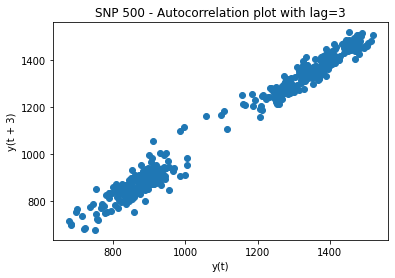

In [48]:
plt.figure()
lag_plot(df['Close'], lag=3)
plt.title('SNP 500 - Autocorrelation plot with lag=3')
plt.show()

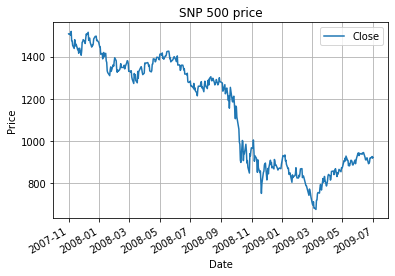

In [54]:
df.plot(x='Date', y="Close")
# plt.plot(df["Date"], df["Close"])
plt.title('SNP 500 price')
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid()
plt.show()

In [19]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
training_data = train_data["Close"].values
testing_data = test_data["Close"].values

history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)

for time_point in range(N_test_observations):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)

MSE_error = mean_squared_error(test_data, model_predictions)
print(f"Testing Mean Squared Error is {MSE_error}")


TypeError: fit() got an unexpected keyword argument 'disp'